In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import the data required
data = pd.read_csv('/gdrive/MyDrive/Risk Prediction/Dataset/Mortality_incidence_sociodemographic_and_clinical_data_in_COVID19_patients.csv')
data.head()

,Derivation cohort,LOS_Y,LOS,Death,Age,Severity,Black,White,Asian,Latino,...,Ferritin > 300,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1
0,1,1,1,0,>80,3,0,0,0,0,...,0,1,0.4999,0,0,0.0,0,1,0.01,0
1,1,1,2,1,>60,7,0,1,0,0,...,1,1,14.9000,1,1,0.6,1,1,1.20,1
2,1,1,2,1,>80,7,0,1,0,0,...,1,1,33.9000,1,1,1.2,1,0,0.00,0
3,1,1,15,0,>70,9,1,0,0,0,...,1,1,18.4000,1,1,7.3,1,1,0.05,0
4,1,1,9,0,>70,7,1,0,0,0,...,1,1,11.6000,1,0,0.0,0,1,0.01,0


**EDA - Visualization and Analyses**

In [ ]:
#Display the name of each column for reference
data.columns.sort_values()

Index(['ALT', 'ALT > 40', 'ALTYes', 'AST', 'AST > 40', 'ASTYes', 'Age',
       'Age.1', 'AgeScore', 'All CNS', 'Asian', 'BUN', 'BUN > 30', 'BUNYes',
       'Black', 'C-Reactive Prot > 10', 'CHF', 'COPD', 'CVD', 'CrctProtYes',
       'CrctProtein', 'Creatinine', 'CrtnScore', 'CrtnYes', 'D-Dimer > 3',
       'DDimerYes', 'DEMENT', 'DM Complicated', 'DM Simple', 'Ddimer', 'Death',
       'Derivation cohort', 'Ferritin', 'Ferritin > 300', 'FerritinYes',
       'Glucose', 'Glucose <60 or > 500', 'GlucoseYese', 'IL6', 'IL6 > 150',
       'IL6Yes', 'INR', 'INR > 1.2', 'INRYes', 'LOS', 'LOS_Y', 'Latino',
       'Lympho', 'LymphoYes', 'Lymphocytes < 1', 'MAP', 'MAP < 70', 'MI',
       'MapYes', 'O2 Sat < 94', 'O2SatsYes', 'OldOtherNeuro', 'OldSyncope',
       'OsSats', 'OtherBrnLsn', 'PVD', 'Plts', 'PltsScore', 'PltsYes',
       'ProCalCYes', 'Procalciton > 0.1', 'Procalcitonin', 'Pure CNS',
       'Renal Disease', 'Seizure', 'Severity', 'SodimuYes', 'Sodium',
       'Sodium < 139 or > 154', 'S

In [ ]:
data['Death'].value_counts()

0    3563
1    1148
Name: Death, dtype: int64

In [ ]:
data.shape

(4711, 85)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 85 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Derivation cohort      4711 non-null   int64  
 1   LOS_Y                  4711 non-null   int64  
 2   LOS                    4711 non-null   int64  
 3   Death                  4711 non-null   int64  
 4   Age                    4711 non-null   object 
 5   Severity               4711 non-null   int64  
 6   Black                  4711 non-null   int64  
 7   White                  4711 non-null   int64  
 8   Asian                  4711 non-null   int64  
 9   Latino                 4711 non-null   int64  
 10  MI                     4711 non-null   int64  
 11  PVD                    4711 non-null   int64  
 12  CHF                    4711 non-null   int64  
 13  CVD                    4711 non-null   int64  
 14  DEMENT                 4711 non-null   int64  
 15  COPD

In [ ]:
#Is there any null?
data.isna().sum().any()

False

**Deeper Feature Analysis**

In [ ]:
data['Age.1'].describe()

count    4711.000000
mean       63.369561
std        16.701791
min        18.000000
25%        54.000000
50%        65.000000
75%        76.000000
max       103.000000
Name: Age.1, dtype: float64

In [ ]:
#Describe age grouped
data.Age.describe()

count     4711
unique       4
top       0-60
freq      1854
Name: Age, dtype: object

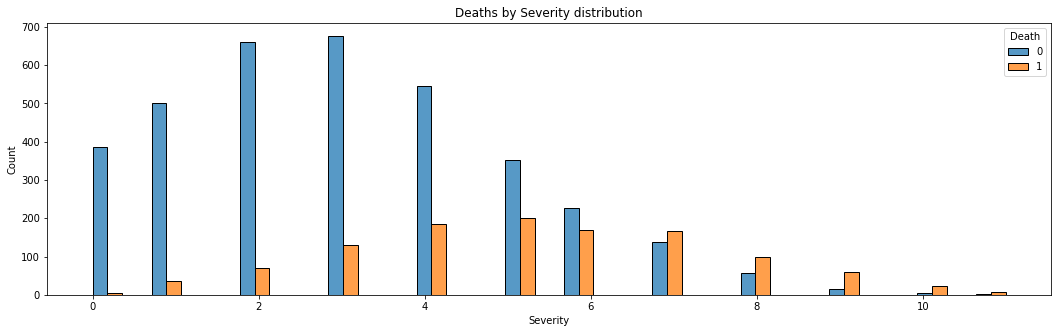

In [ ]:
#Plot distribution by sevetiry class
plt.figure(figsize=(18,5))
plt.title('Deaths by Severity distribution')
sns.histplot(x='Severity', hue='Death', multiple="dodge", data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


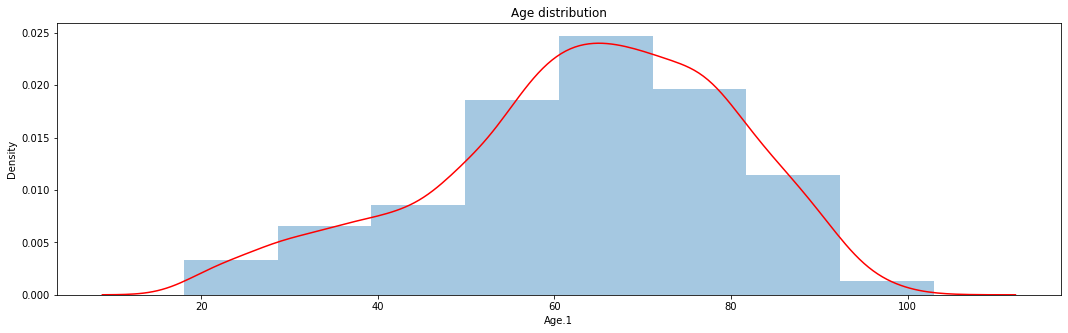

In [ ]:
#Plot distribution of ages
plt.figure(figsize=(18,5))
plt.title('Age distribution')
sns.distplot(a=data['Age.1'], bins=8, kde_kws={"color":"red"})

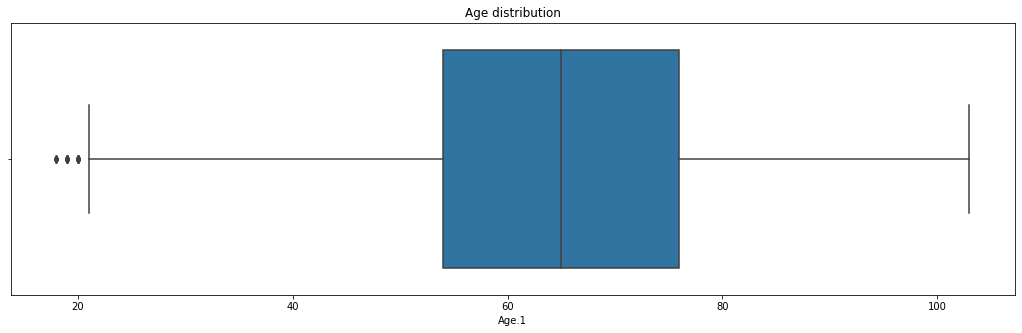

In [ ]:
#Plot boxplot with detailed info of age
plt.figure(figsize=(18,5))
plt.title('Age distribution')
sns.boxplot(x=data['Age.1'])

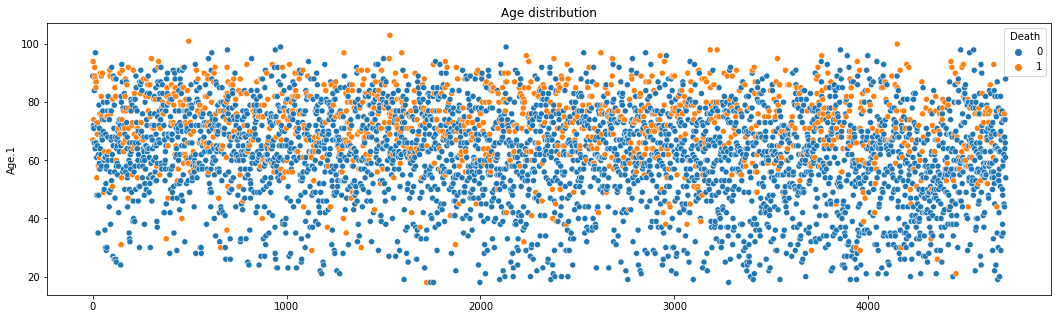

In [ ]:
#Plot scatter with detailed info of age vs survived
plt.figure(figsize=(18,5))
plt.title('Age distribution')
sns.scatterplot(x=data.index, y=data['Age.1'], hue=data.Death)

In [ ]:
print('Percentage of people that survived: ',(data.Death.value_counts(normalize=True)*100)[0])
print('Percentage of people that not survived: ',(data.Death.value_counts(normalize=True)*100)[1])

Percentage of people that survived:  75.63150074294205
Percentage of people that not survived:  24.368499257057948


In [ ]:
# How many times each age appears
data['Age.1'].value_counts()[:10]

77    137
60    128
65    122
62    120
67    118
71    113
63    112
68    111
70    111
64    110
Name: Age.1, dtype: int64

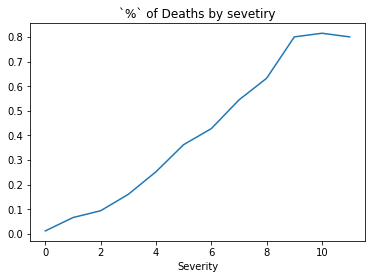

In [ ]:
# Plot the percentage of deaths by each severity class
grouped = data.groupby('Severity').sum()['Death'] / data.groupby('Severity').count()['Death']
grouped.plot(title = '`%` of Deaths by sevetiry')

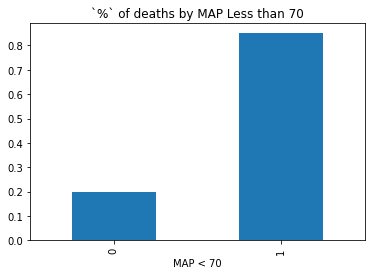

In [ ]:
# Plot the percentage of deaths by Maps Less than 70
grouped = data.groupby('MAP < 70').sum()['Death'] / data.groupby('MAP < 70').count()['Death']
grouped.plot.bar(title = '`%` of deaths by MAP Less than 70')

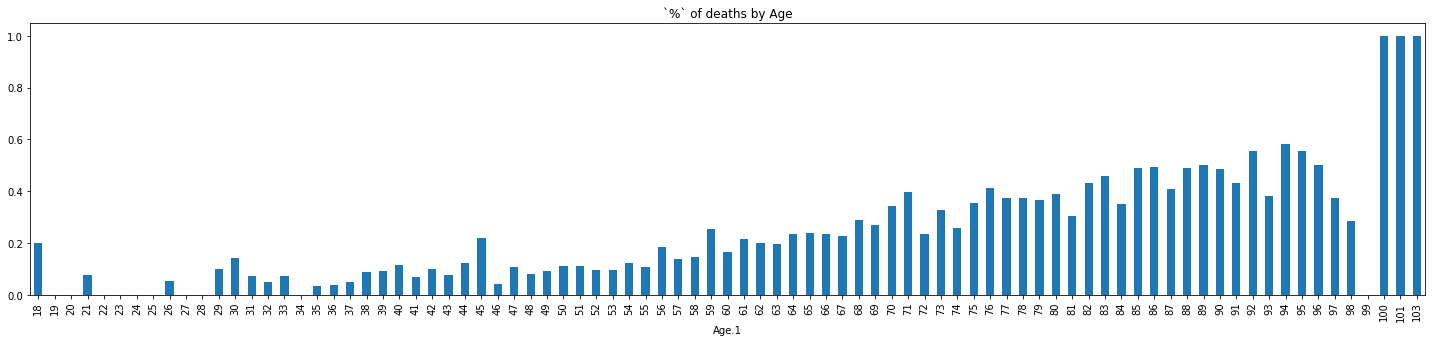

In [ ]:
# Plot the percentage of deaths by Age
groupedAge = data.groupby('Age.1').sum()['Death'] / data.groupby('Age.1').count()['Death']
groupedAge.plot.bar(title = '`%` of deaths by Age', figsize=(25,5))

In [ ]:
#show only column names with more than 2 unique values, discarding all boolean ones. 
cols = ((data.dtypes != 'object') & (data.nunique() > 2))
cols = cols.drop(['LOS', 'Severity', 'Age.1', 'AgeScore','CrtnScore','PltsScore']) #drop items that show categories, scores, etc.
normFeatures = list(cols[cols].index)
print(normFeatures)

['PVD', 'OsSats', 'Temp', 'MAP', 'Ddimer', 'Plts', 'INR', 'BUN', 'Creatinine', 'Sodium', 'Glucose', 'AST', 'ALT', 'WBC', 'Lympho', 'IL6', 'Ferritin', 'CrctProtein', 'Procalcitonin', 'Troponin']


In [ ]:
#Apply StandardScaler() in a couple of columns
from sklearn.preprocessing import StandardScaler


normalizedData = data.copy()

for name in normFeatures:
    normalizedData[name] = (normalizedData[name] - normalizedData[name].mean()) / normalizedData[name].std()

normalizedData[normFeatures]

,PVD,OsSats,Temp,MAP,Ddimer,Plts,INR,BUN,Creatinine,Sodium,Glucose,AST,ALT,WBC,Lympho,IL6,Ferritin,CrctProtein,Procalcitonin,Troponin
0,-0.458389,0.285030,0.139296,0.854319,-0.492014,-0.185817,-0.005001,-0.358682,-0.472912,0.122175,-0.120675,-0.181950,-0.264676,-0.390357,0.018778,-0.055855,-0.341258,-0.874517,-0.253185,-0.154975
1,1.987216,-0.031302,0.066939,0.173644,-0.068789,0.239771,0.295730,5.727982,2.749458,0.186657,1.047159,0.106565,-0.099523,0.506829,-0.207418,-0.055855,-0.055447,0.408530,-0.157378,4.282678
2,1.987216,0.495918,0.440351,-0.588696,-0.083972,-0.776429,-0.105244,1.851738,0.573410,0.283380,-0.051979,-0.152610,-0.227975,-0.322389,-0.166292,0.088926,-0.138123,2.101429,-0.061572,-0.192266
3,-0.458389,-0.189468,0.397713,0.854319,-0.038423,-0.029478,0.195486,-0.871244,2.408266,0.025452,-0.975559,-0.093929,-0.237151,-0.648638,-0.166292,-0.055855,-0.077731,0.720380,0.912461,-0.005810
4,-0.458389,0.179586,0.290469,0.922101,-0.298431,-0.880655,-0.105244,-0.871244,0.247382,0.573549,-0.975559,-0.123269,-0.136223,-0.376764,0.018778,-0.038255,0.204851,0.114501,-0.253185,-0.154975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4706,-0.458389,-4.723560,-4.627205,-3.337938,0.010922,1.056206,-0.005001,-0.614963,-0.472912,0.251139,-0.235168,-0.196621,-0.172924,0.248548,-0.063475,-0.055855,-0.245988,-0.758678,-0.237233,-0.154975
4707,1.987216,0.074142,0.153509,0.201001,-0.512890,-0.359526,-0.105244,-0.454788,-0.510823,0.154416,-0.975559,-0.113489,-0.117873,-0.594264,-0.022349,-0.055855,0.034979,-0.642849,-0.237233,-0.154975
4708,1.987216,0.285030,0.096657,0.731822,-0.541358,0.995408,-0.105244,-0.646998,-0.435002,0.154416,0.192274,-0.181950,-0.246326,-0.145670,-0.063475,-0.055855,-0.264073,-0.874517,-0.253185,-0.192266
4709,1.987216,0.285030,0.139296,0.160169,-0.446465,2.237430,-0.105244,-0.326647,-0.325062,0.186657,0.024350,-0.157500,-0.090347,-0.118483,0.101031,-0.055855,0.041438,-0.152799,-0.237217,-0.154975


In [ ]:
#Retrieve the data with the original name
data = normalizedData

In [ ]:
data.columns

Index(['Derivation cohort', 'LOS_Y', 'LOS', 'Death', 'Age', 'Severity',
       'Black', 'White', 'Asian', 'Latino', 'MI', 'PVD', 'CHF', 'CVD',
       'DEMENT', 'COPD', 'DM Complicated', 'DM Simple', 'Renal Disease',
       'All CNS', 'Pure CNS', 'Stroke', 'Seizure', 'OldSyncope',
       'OldOtherNeuro', 'OtherBrnLsn', 'Age.1', 'AgeScore', 'O2SatsYes',
       'OsSats', 'O2 Sat < 94', 'TempYes', 'Temp', 'Temp > 38', 'MapYes',
       'MAP', 'MAP < 70', 'DDimerYes', 'Ddimer', 'D-Dimer > 3', 'PltsYes',
       'Plts', 'PltsScore', 'INRYes', 'INR', 'INR > 1.2', 'BUNYes', 'BUN',
       'BUN > 30', 'CrtnYes', 'Creatinine', 'CrtnScore', 'SodimuYes', 'Sodium',
       'Sodium < 139 or > 154', 'GlucoseYese', 'Glucose',
       'Glucose <60 or > 500', 'ASTYes', 'AST', 'AST > 40', 'ALTYes', 'ALT',
       'ALT > 40', 'WBCYes', 'WBC', 'WBC <1.8 or > 4.8', 'LymphoYes', 'Lympho',
       'Lymphocytes < 1', 'IL6Yes', 'IL6', 'IL6 > 150', 'FerritinYes',
       'Ferritin', 'Ferritin > 300', 'CrctProtYes', 'Crc

**New Feature Creation**

---


As the probability of death is well defined in relation to “Severity”, we can apply a binning method to cluster these classes into 4 groups. Class 3 contains the 4 highest values for original “Severity” values, with a high probability of death. So, we were able to improve the predictive capacity of the model that can focus between 4 classes, instead of 12 as we had originally.

In [ ]:
#Group (cut) severity by classes - Apply Binning
labels = [0,1,2,3]
data['Severity_class'] = pd.cut(data['Severity'], bins=4, labels=labels, right=False)
data.head()

,Derivation cohort,LOS_Y,LOS,Death,Age,Severity,Black,White,Asian,Latino,...,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1,Severity_class
0,1,1,1,0,>80,3,0,0,0,0,...,1,-0.874517,0,0,-0.253185,0,1,-0.154975,0,1
1,1,1,2,1,>60,7,0,1,0,0,...,1,0.408530,1,1,-0.157378,1,1,4.282678,1,2
2,1,1,2,1,>80,7,0,1,0,0,...,1,2.101429,1,1,-0.061572,1,0,-0.192266,0,2
3,1,1,15,0,>70,9,1,0,0,0,...,1,0.720380,1,1,0.912461,1,1,-0.005810,0,3
4,1,1,9,0,>70,7,1,0,0,0,...,1,0.114501,1,0,-0.253185,0,1,-0.154975,0,2


In [ ]:
#How many records do we have in each class
data['Severity_class'].value_counts()

1    2088
0    1656
2     855
3     112
Name: Severity_class, dtype: int64

In [ ]:
#The severity class may be a Dtype-Category. So we transform it in a int to use below.
#Severity_class to int
data['Severity_class'] = data['Severity_class'].astype('int64')
data['Severity_class'][:5]

0    1
1    2
2    2
3    3
4    2
Name: Severity_class, dtype: int64

In [ ]:
# Calculate the correlation between variables and Deaths
correlation_order = data.corr()[['Death']].sort_values(by=['Death'], ascending = False).drop(['Death'])
correlation_order.head(54)

,Death
Severity,0.431134
Severity_class,0.406420
MAP < 70,0.392984
Age.1,0.291806
AgeScore,0.286053
CrtnScore,0.226512
CrctProtein,0.215827
Procalciton > 0.1,0.211338
BUN > 30,0.205231
C-Reactive Prot > 10,0.195811


In [ ]:
# Calculate the correlation between variables and Severity_class
correlation_order_Severity = data.corr()[['Severity_class']].sort_values(by=['Severity_class'], ascending = False).drop(['Severity_class'])
correlation_order_Severity[:25]

,Severity_class
Severity,0.939068
AgeScore,0.597620
Age.1,0.571411
CrtnScore,0.526002
BUN > 30,0.446396
C-Reactive Prot > 10,0.438396
D-Dimer > 3,0.434053
INR > 1.2,0.434053
BUN,0.434050
Death,0.406420


In [ ]:
req_features=['Derivation cohort', 'LOS_Y', 'LOS', 'Age', 'Severity', 'White', 'COPD', 'Renal Disease',
       'All CNS', 'Pure CNS', 'Stroke', 'Age.1', 'AgeScore', 'O2SatsYes', 'O2 Sat < 94', 'TempYes', 'Temp > 38', 'MAP < 70', 'Ddimer', 'D-Dimer > 3', 'PltsYes', 'PltsScore', 'INRYes', 'INR', 'INR > 1.2', 'BUN',
       'BUN > 30', 'CrtnYes', 'Creatinine', 'CrtnScore', 'Sodium',
       'Sodium < 139 or > 154', 'ASTYes', 'AST', 'AST > 40', 'ALTYes', 'ALT', 'WBCYes', 'WBC', 'WBC <1.8 or > 4.8', 'LymphoYes',
       'Lymphocytes < 1', 'IL6', 'IL6 > 150',
       'Ferritin', 'Ferritin > 300', 'CrctProtein',
       'C-Reactive Prot > 10', 'ProCalCYes', 'Procalcitonin',
       'Procalciton > 0.1', 'TropYes', 'Troponin', 'Troponin > 0.1','Death']

In [ ]:
preciseData=data[req_features]

In [ ]:
preciseData.head()

,Derivation cohort,LOS_Y,LOS,Age,Severity,White,COPD,Renal Disease,All CNS,Pure CNS,...,Ferritin > 300,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1,Death
0,1,1,1,>80,3,0,0,0,0,0,...,0,-0.874517,0,0,-0.253185,0,1,-0.154975,0,0
1,1,1,2,>60,7,1,0,0,0,0,...,1,0.408530,1,1,-0.157378,1,1,4.282678,1,1
2,1,1,2,>80,7,1,1,1,0,0,...,1,2.101429,1,1,-0.061572,1,0,-0.192266,0,1
3,1,1,15,>70,9,0,0,0,1,1,...,1,0.720380,1,1,0.912461,1,1,-0.005810,0,0
4,1,1,9,>70,7,0,0,0,0,0,...,1,0.114501,1,0,-0.253185,0,1,-0.154975,0,0


In [ ]:
preciseData.shape

(4711, 55)

In [ ]:
preciseData.to_csv('/gdrive/MyDrive/Risk Prediction/Dataset/PreprocessedData.csv')